In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
from pathlib import Path

from src.interface_representation.interface_transformations import InterfaceRepresentationType
from src.datasets.phi_field_dataset import PhiDataset, PatchPhiDataset
from src.paths import project_dir

logging.basicConfig(level=logging.INFO)

In [2]:
base_dir = Path('/Volumes/My Passport for Mac/Multiphase-droplet-evolution')
exact_sdf_dir = base_dir / 'exact_sdf'
approximate_sdf_dir = base_dir / 'approximate_sdf'
tanh_sharper_dir = base_dir / 'tanh_512_sharper'
tanh_smooth_dir = base_dir / 'tanh_128_smoother'

In [3]:
# Either, change dataset class so that we load phi directly from npz files in a directory and then a specified transformation is only applied at the end when we want to compute metrics? Let's save all the analysis for later, and plan to copy the .npz validation set predictions back to my laptop for conversion and/or metric computation. So in this case, we are happy for the PhiDataset class to load data directly without applying any transforms during construction. Just need to make sure that the validation predictions are saved.

In [4]:
dataset_exact_sdf = PhiDataset(exact_sdf_dir, split='val', debug=True)
dataset_approximate_sdf = PhiDataset(approximate_sdf_dir, split='val', debug=True)
dataset_tanh = PhiDataset(base_dir, split='val', debug=True)
dataset_tanh_sharp = PhiDataset(tanh_sharper_dir, split='val', debug=True)
dataset_tanh_smooth = PhiDataset(tanh_smooth_dir, split='val', debug=True)

INFO:src.datasets.phi_field_dataset:Constructed splits of size (number of runs NOT snapshots): train=991, val=247
INFO:src.datasets.phi_field_dataset:Loaded 3 files for split val
INFO:src.datasets.phi_field_dataset:First file: /Volumes/My Passport for Mac/Multiphase-droplet-evolution/exact_sdf/2023-05-12-09-22-Folder_966_Restart_001_0.795259.npz
INFO:src.datasets.phi_field_dataset:Generated 3 samples of HIT data with interface representation InterfaceRepresentationType.TANH
INFO:src.datasets.phi_field_dataset:Each sample has shape torch.Size([1, 256, 256, 256])
INFO:src.datasets.phi_field_dataset:Constructed splits of size (number of runs NOT snapshots): train=991, val=247
INFO:src.datasets.phi_field_dataset:Loaded 3 files for split val
INFO:src.datasets.phi_field_dataset:First file: /Volumes/My Passport for Mac/Multiphase-droplet-evolution/approximate_sdf/2023-05-12-09-22-Folder_966_Restart_001_0.795259.npz
INFO:src.datasets.phi_field_dataset:Generated 3 samples of HIT data with inter

In [5]:
# First, check that all datasets have same length
assert len(dataset_exact_sdf) == len(dataset_approximate_sdf) == len(dataset_tanh) == len(dataset_tanh_sharp) == len(dataset_tanh_smooth)

In [11]:

def visualise_dataset_sample(arr):
    arr = arr.squeeze()
    
    fig, axs = plt.subplots(1, 3, figsize=(9, 3))
    im = axs[0].imshow(arr[128, :, :])
    fig.colorbar(im, ax=axs[0])
    im = axs[1].imshow(arr[:, 128, :])
    fig.colorbar(im, ax=axs[1])
    im = axs[2].imshow(arr[:, :, 128])
    fig.colorbar(im, ax=axs[2])
    plt.show()
    plt.close()


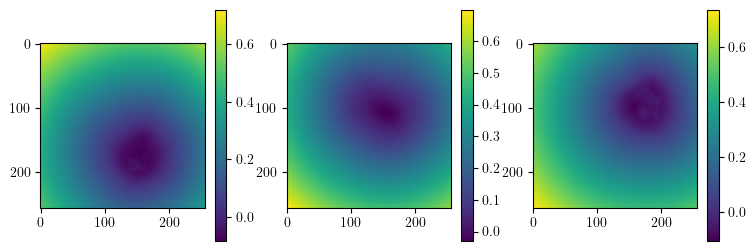

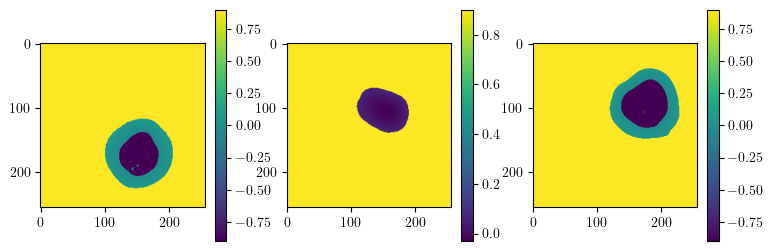

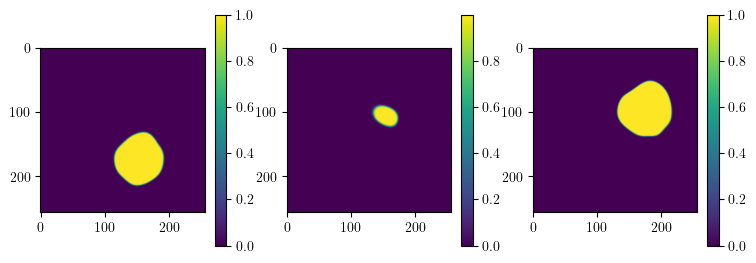

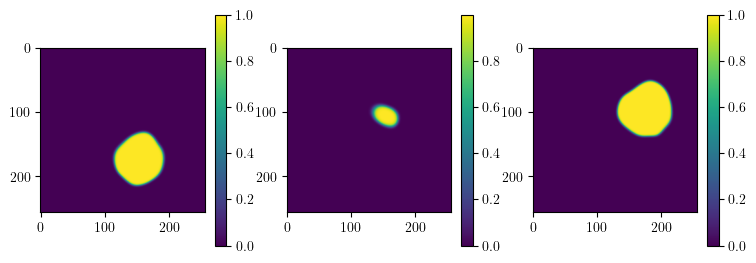

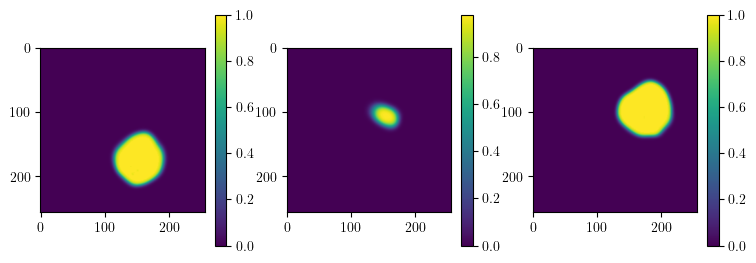

In [13]:
# Visualise first sample from each dataset

visualise_dataset_sample(dataset_exact_sdf[0])
visualise_dataset_sample(dataset_approximate_sdf[0])
visualise_dataset_sample(dataset_tanh_sharp[0])
visualise_dataset_sample(dataset_tanh[0])
visualise_dataset_sample(dataset_tanh_smooth[0])